1º Running the blossom Python file with all the defined functions in Gabriel's repository (BerryGarden)

In [1]:
%run C:\Users\ferna\GCVI_ACES\Github_repositories\BerryGarden\blossom

It's important to take in mind the issue related to the decimal symbol in the data set. It could be a proble with the dataset (comment with Gabriel)

In [3]:
CVI, CE = cb.readCVI(path=r'C:\Users\ferna\GCVI_ACES\Data\GCVI\2020'+'\\',
                     startdate='2020-07-01',
                     enddate='2020-11-12',
                     )

0it [00:00, ?it/s]C:\Users\ferna\GCVI_ACES\Github_repositories\BerryGarden\cloudberry.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
C:\Users\ferna\GCVI_ACES\Github_repositories\BerryGarden\cloudberry.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ef = ef.append(ef1)
C:\Users\ferna\GCVI_ACES\Github_repositories\BerryGarden\cloudberry.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gcvi = gcvi.append(df)
1it [00:02,  2.83s/it]C:\Users\ferna\GCVI_ACES\Github_repositories\BerryGarden\cloudberry.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
C:\Users\ferna\GCVI_ACES\Github_rep

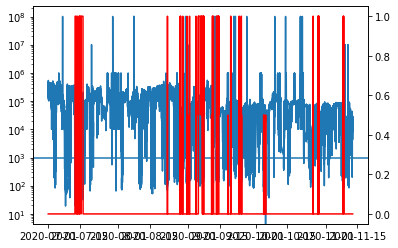

In [4]:
plt.plot(CVI.visiblty)
plt.yscale('log')
plt.axhline(y=1e3)
plt.twinx()
plt.plot(CVI.cloud,color='red')

CE dataframe collect the datetime information of every cloud event during the specified period

In [5]:
CE

,S,E,D
0,2020-07-12 20:27:17,2020-07-13 07:16:44,0 days 10:49:27
1,2020-07-13 17:32:59,2020-07-13 20:27:38,0 days 02:54:39
2,2020-07-14 16:32:58,2020-07-14 20:22:41,0 days 03:49:43
3,2020-07-14 21:17:51,2020-07-15 10:32:02,0 days 13:14:11
4,2020-07-15 13:24:28,2020-07-16 09:41:36,0 days 20:17:08
5,2020-08-22 20:07:50,2020-08-22 20:49:01,0 days 00:41:11
6,2020-08-22 20:51:01,2020-08-22 20:52:26,0 days 00:01:25
7,2020-08-28 12:00:50,2020-08-28 12:28:18,0 days 00:27:28
8,2020-08-28 16:15:32,2020-08-28 17:03:29,0 days 00:47:57
9,2020-08-29 14:31:47,2020-08-29 15:12:53,0 days 00:41:06


In [ ]:
DMPS_Cloud = DMPS[(DMPS.index > CE.loc[5].S)&(DMPS.index < CE.loc[5].E)]